# Análise IV

## Horas do dia

In [3]:
!pip install seaborn==0.9.0
import seaborn as sns
import pandas as pd
from scipy.stats import ranksums

In [2]:
dados = pd.read_csv('gorjetas.csv', sep=';')
dados.head(2)

,valor_total,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16


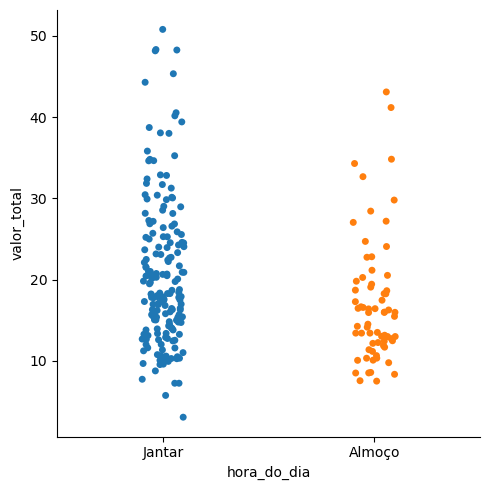

In [4]:
sns.catplot(x='hora_do_dia', y='valor_total', data=dados)

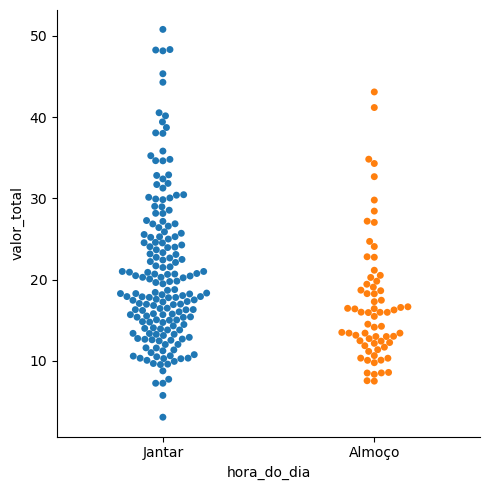

In [5]:
sns.catplot(x='hora_do_dia', y='valor_total', kind='swarm', data=dados)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_total'>

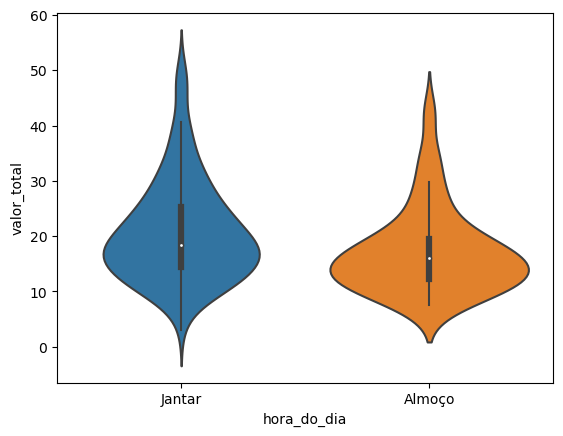

In [6]:
sns.violinplot(x='hora_do_dia', y='valor_total', data=dados)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_total'>

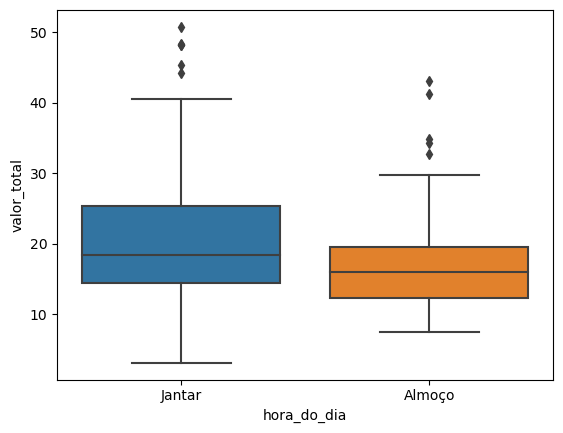

In [7]:
sns.boxplot(x='hora_do_dia', y='valor_total', data=dados)

In [8]:
almoco = dados.query("hora_do_dia == 'Almoço'").valor_total
jantar = dados.query("hora_do_dia == 'Jantar'").valor_total

<AxesSubplot:xlabel='valor_total'>

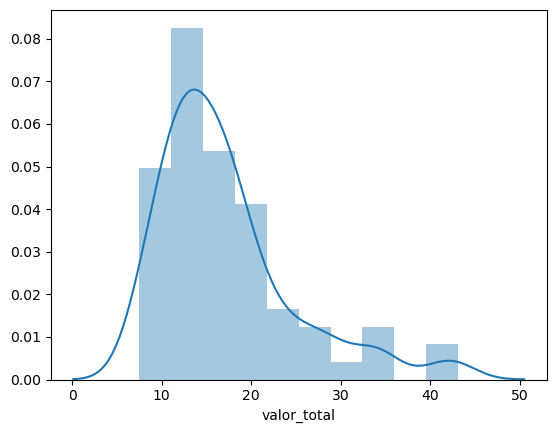

In [9]:
sns.distplot(almoco)

<AxesSubplot:xlabel='valor_total'>

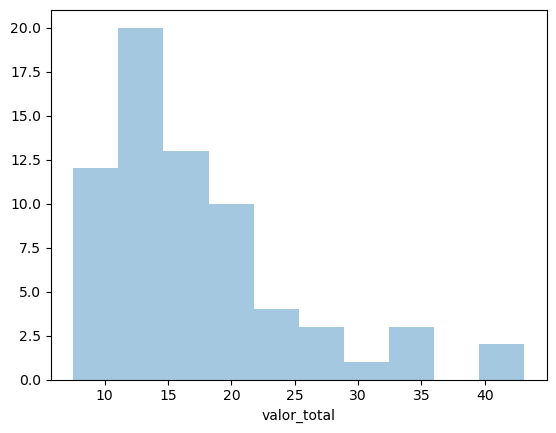

In [10]:
sns.distplot(almoco, kde=False)

<AxesSubplot:xlabel='valor_total'>

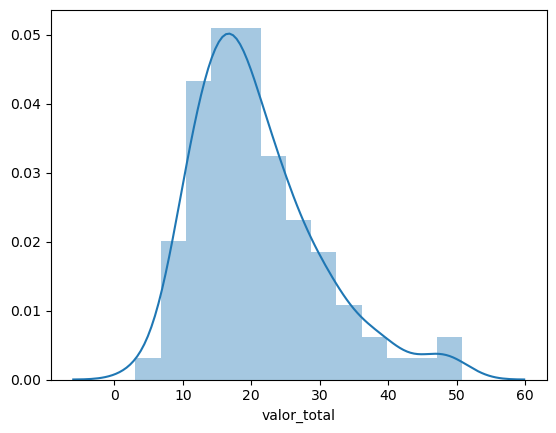

In [11]:
sns.distplot(jantar)

<AxesSubplot:xlabel='valor_total'>

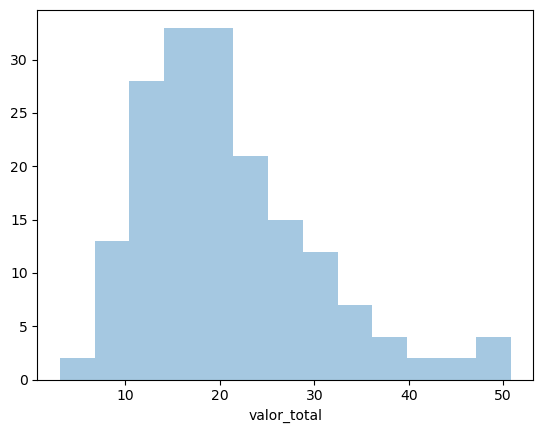

In [12]:
sns.distplot(jantar, kde=False)

In [15]:
media = dados.groupby(['hora_do_dia']).mean()[['valor_total', 'gorjeta', 'porcentagem']]

In [16]:
media

,valor_total,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


## Teste de hipótese

**H<sup>null</sup>**
>**A distribuição do valor da conta é igual no Jantar e no Almoço**

**H<sup>alt</sup>**
>**A distribuição do valor da conta não é igual no Jantar e no Almoço**



In [18]:
r = ranksums(jantar,almoco)

In [21]:
print('O valor do p-value é de {}'.format(r.pvalue))

O valor do p-value é de 0.0011791039723641672


**H<sup>alt</sup>**
>**A distribuição do valor da conta não é igual no Jantar e no Almoço**



In [24]:
p_almoco = dados.query("hora_do_dia == 'Almoço'").porcentagem
p_jantar = dados.query("hora_do_dia == 'Jantar'").porcentagem

## Teste de hipótese 2

**H<sup>null</sup>**
>**A distribuição da taxa da gorjeta é igual no Jantar e no Almoço**

**H<sup>alt</sup>**
>**A distribuição da taxa da gorjeta não é igual no Jantar e no Almoço**



In [26]:
r2 = ranksums(p_almoco, p_jantar)

In [27]:
print('O valor do p-value é de {}'.format(r2.pvalue))

O valor do p-value é de 0.2602493995587126


**H<sup>null</sup>**
>**A distribuição da taxa da gorjeta é igual no Jantar e no Almoço**